In [1]:
# !pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
music_df = pd.read_csv('./data/merged_music.csv')
weather_df = pd.read_csv('./data/weather_charts_processed.csv')
charts_df = pd.read_csv('./data/spotify_2025_daily_charts.csv')

In [4]:
merged = charts_df.merge(music_df, on=['track_name','artist_names'], how='left')

merged_df = merged.merge(weather_df, on='date', how='left')

merged_df['date'] = pd.to_datetime(merged_df['date'])
merged_df['day_of_week'] = merged_df['date'].dt.day_name()

merged_df['track_name'] = merged_df['track_name'].str.lower()

df = merged_df


In [5]:
print(merged_df.columns)

Index(['rank', 'uri', 'artist_names', 'track_name', 'source', 'peak_rank',
       'previous_rank', 'days_on_chart', 'streams', 'date', 'music_id',
       'genre', 'track_length_sec', 'release_country', 'tempo', 'mean_mel',
       'mean_rms', 'max_rms', 'mean_zcr', 'std_zcr', 'mean_centroid',
       'temp_avg', 'temp_top', 'temp_bot', 'rain', 'snow', 'windspeed_avg',
       'humidity_avg', 'cloudcover', 'sunshine_hr', 'DI', '맑음', '구름조금', '구름많음',
       '흐림', '안개', '이슬비', '소나기', '비', '진눈개비', '눈', '천둥번개', '황사',
       'day_of_week'],
      dtype='str')


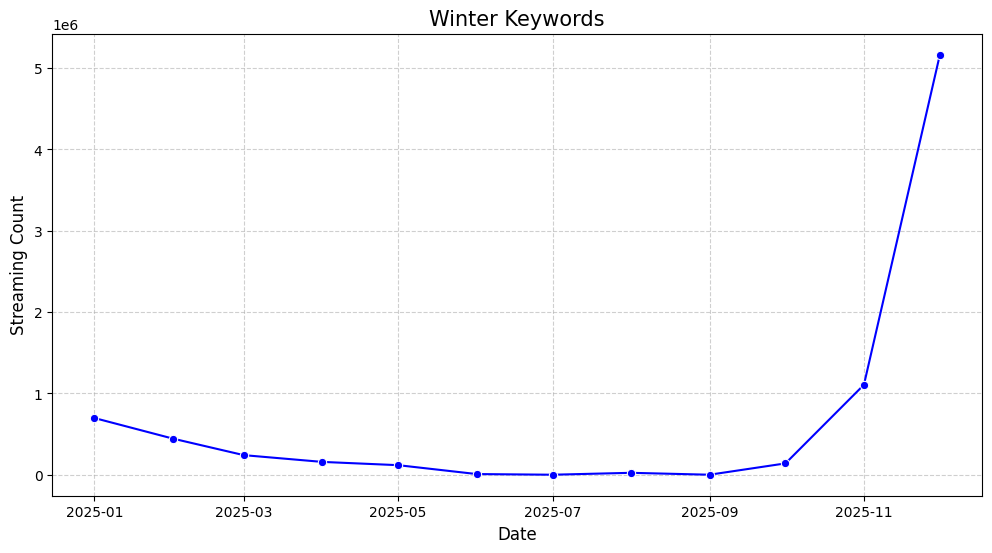

In [6]:
winter_keyword = ['christmas', '크리스마스', 'snow', '눈']

regex_pattern = '|'.join(winter_keyword)
winter_data = df[df['track_name'].str.contains(regex_pattern, case=False, na=False)]

monthly_streaming = winter_data.resample('MS', on='date')['streams'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_streaming, x='date', y='streams', marker='o', color='blue')

plt.title('Winter Keywords', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Streaming Count', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [7]:
winter_data['tempo'].mean()

np.float64(124.02461273666091)

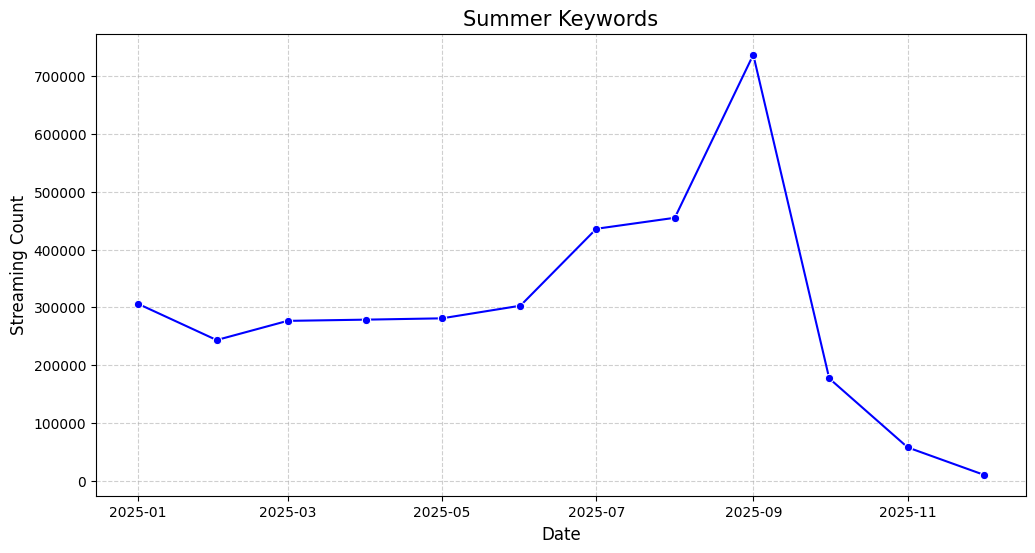

In [8]:
summer_keyword = ['summer', '여름', '바다', 'cool', '시원']

regex_pattern = '|'.join(summer_keyword)
summer_data = df[df['track_name'].str.contains(regex_pattern, case=False, na=False)]

monthly_streaming = summer_data.resample('MS', on='date')['streams'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_streaming, x='date', y='streams', marker='o', color='blue')

plt.title('Summer Keywords', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Streaming Count', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

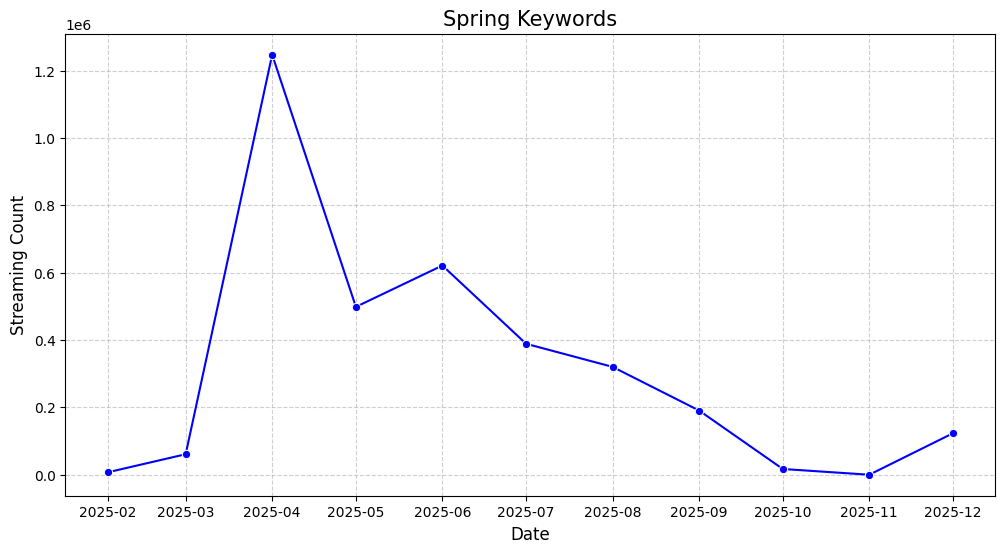

In [9]:
spring_keyword = ['봄', 'spring', '벚꽃', 'blossom']

regex_pattern = '|'.join(spring_keyword)
spring_data = df[df['track_name'].str.contains(regex_pattern, case=False, na=False)]

monthly_streaming = spring_data.resample('MS', on='date')['streams'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_streaming, x='date', y='streams', marker='o', color='blue')

plt.title('Spring Keywords', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Streaming Count', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

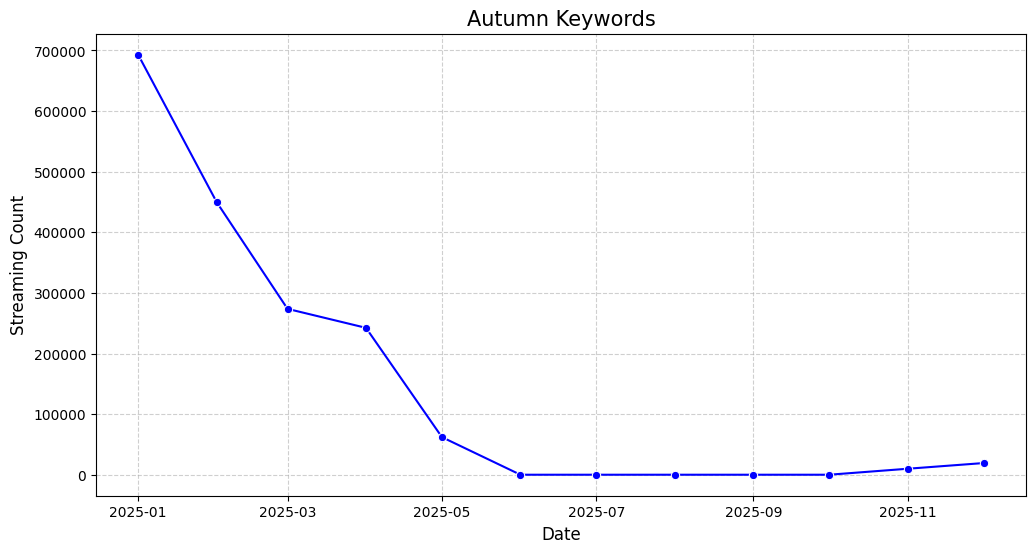

In [ ]:
# 데이터셋에서 직접 찾아본 결과 가을 키워드가 포함된 곡명이 없는 것으로 확인되어 분석에서 제외하였습니다.
fall_keyword = ['leaves', '가을', '낙엽', 'autumn', 'fall']

regex_pattern = '|'.join(fall_keyword)
fall_data = df[df['track_name'].str.contains(regex_pattern, case=False, na=False)]

monthly_streaming = fall_data.resample('MS', on='date')['streams'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_streaming, x='date', y='streams', marker='o', color='blue')

plt.title('Autumn Keywords', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Streaming Count', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()